In [1]:
import tensorflow as tf
import numpy as np

In [8]:
tf.__version__

'2.0.0'

In [46]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0
    0   0   0   0 164  50   0   7   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   1   0   0   1   1   0   0
    5   0  45 217 255 176   0   6   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0   3   3   5   9   0   2
    0  62 236 231 215  27   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   29 244 231 234  74   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0  23  41  59 111 134
  138 226 202 217  22   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0  35 179 195 182 225 198 241
  177 199 205 210  26   0   1   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0  19   0   0 

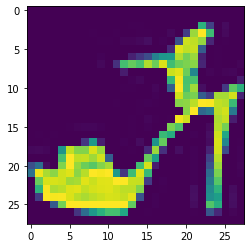

In [47]:
import matplotlib.pyplot as plt
plt.imshow(train_images[9])
print(train_labels[9])
print(train_images[9])

In [48]:
train_images = train_images/255.0
test_images = test_images/255.0

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [68]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs = 7)

Train on 60000 samples
Epoch 1/7
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4787 - accuracy: 0.8305
Epoch 2/7
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3608 - accuracy: 0.8689
Epoch 3/7
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3249 - accuracy: 0.8808
Epoch 4/7
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2987 - accuracy: 0.8884
Epoch 5/7
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2796 - accuracy: 0.8949
Epoch 6/7
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2661 - accuracy: 0.9013
Epoch 7/7
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2517 - accuracy: 0.9064


This gives about 891% accuracy on training data.

In [69]:
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3208586183786392, 0.884]

This gives an accuracy of about 88% on test data.

### Callbacks

In [73]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
              print("\nReached 60% accuracy so cancelling training!")
              self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


2.0.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4735
Epoch 2/5
59456/60000 [============================>.] - ETA: 0s - loss: 0.3568
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3577
